In [8]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# import dataset
df =pd.read_csv("/content/Dataset .csv")
df=pd.DataFrame(df)

In [3]:
#checking  the first 5 rows of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Task **1**

In [5]:
#Analyzing the text review
sia = SentimentIntensityAnalyzer()
pre = lambda t: [w for w in word_tokenize(t.lower().translate(str.maketrans("", "", string.punctuation))) if w not in stopwords.words('english')]

pos, neg = [], []

for t in df['Rating text'].astype(str):
    tokens = pre(t)
    score = sia.polarity_scores(t)['compound']
    (pos if score >= 0.05 else neg).extend(tokens)

pos_wc, neg_wc = pd.Series(pos).value_counts(), pd.Series(neg).value_counts()

print("Most common positive keywords:")
print(pos_wc.head(10))

print("\nMost common negative keywords:")
print(neg_wc.head(10))

Most common positive keywords:
good         3179
excellent     301
Name: count, dtype: int64

Most common negative keywords:
average    3737
rated      2148
poor        186
Name: count, dtype: int64


In [6]:
#average length of review
df['Review Length'] = df['Rating text'].apply(lambda text: len(nltk.word_tokenize(str(text))))
avg_length = df['Review Length'].mean()
print(f"Average Review Length: {avg_length:.2f} words")
print("\nRelationship between Review Length and Rating:")
print(df.groupby('Aggregate rating')['Review Length'].mean())

Average Review Length: 1.34 words

Relationship between Review Length and Rating:
Aggregate rating
0.0    2.0
1.8    1.0
1.9    1.0
2.0    1.0
2.1    1.0
2.2    1.0
2.3    1.0
2.4    1.0
2.5    1.0
2.6    1.0
2.7    1.0
2.8    1.0
2.9    1.0
3.0    1.0
3.1    1.0
3.2    1.0
3.3    1.0
3.4    1.0
3.5    1.0
3.6    1.0
3.7    1.0
3.8    1.0
3.9    1.0
4.0    2.0
4.1    2.0
4.2    2.0
4.3    2.0
4.4    2.0
4.5    1.0
4.6    1.0
4.7    1.0
4.8    1.0
4.9    1.0
Name: Review Length, dtype: float64


### Task **2**

In [7]:
#Identify the restaurants with the highest and lowest number of votes.
# Find the restaurant with the highest number of votes
restaurant_highest_votes = df.loc[df['Votes'].idxmax()]

# Find the restaurant with the lowest number of votes
restaurant_lowest_votes = df.loc[df['Votes'].idxmin()]

# Print the results
print("Restaurant with the highest number of votes:")
print(restaurant_highest_votes)

print("\nRestaurant with the lowest number of votes:")
print(restaurant_lowest_votes)

Restaurant with the highest number of votes:
Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                                 2000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                  

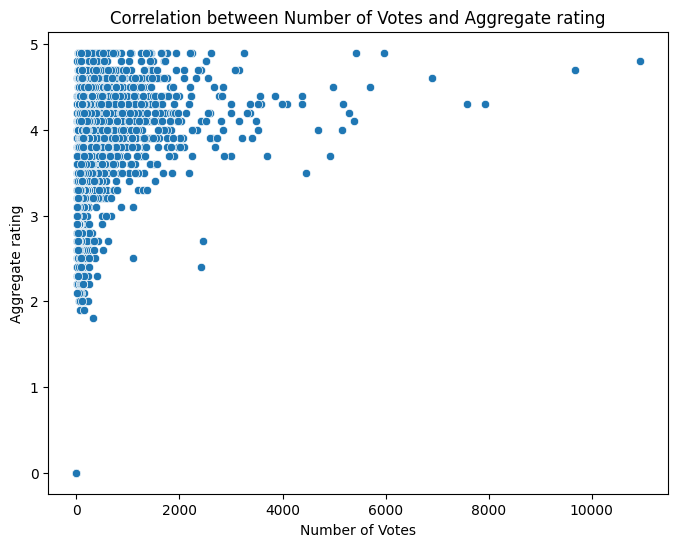

coefficient = 0.31369058419541157


In [13]:
#Analyze if there is a correlation between the number of votes and the rating of a restaurant
# Plot a scatter plot to visualize the correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating')
plt.title('Correlation between Number of Votes and Aggregate rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate rating')
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = df['Votes'].corr(df['Aggregate rating'])
print("coefficient =",correlation_coefficient)

### Task **3**

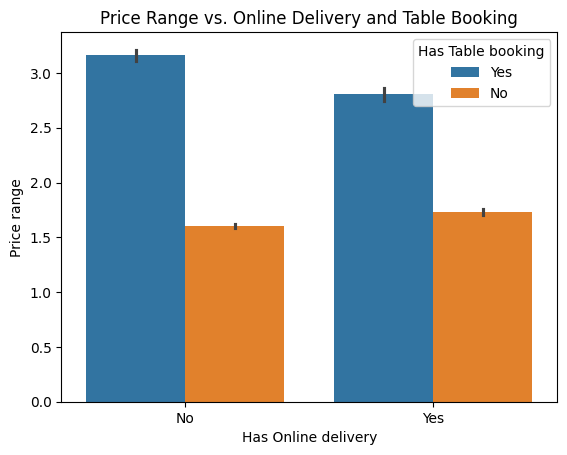

In [15]:
#Analyze if there is a relationship between the price range and the availability of online delivery and table booking
sns.barplot(y='Price range', x='Has Online delivery',hue='Has Table booking', data=df)

plt.xlabel('Has Online delivery')
plt.ylabel('Price range')
plt.title('Price Range vs. Online Delivery and Table Booking')

plt.show()

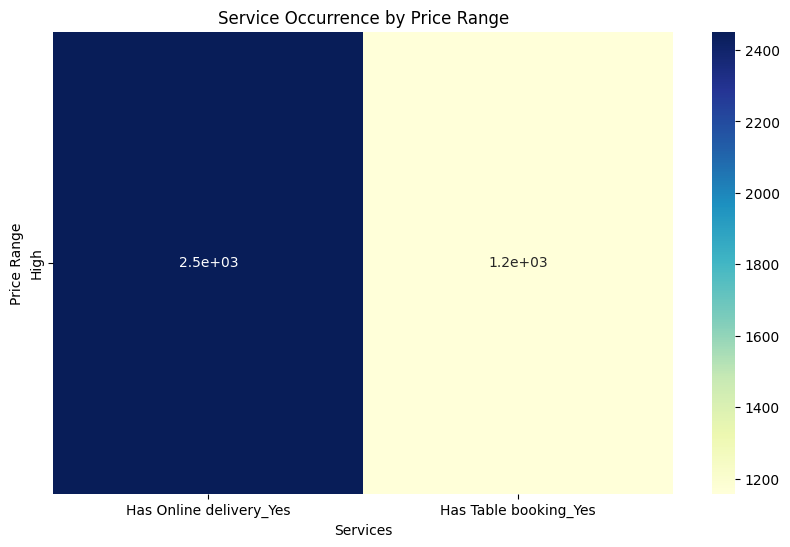

In [19]:
#Determine if higher-priced restaurants are more likely to offer these services.

# Map price range categories to numerical values
price_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Price range'] = df['Price range'].map(price_mapping)

# Categorize restaurants by price range (based on the numerical values)
def categorize_price(price):
    if price == 1:
        return 'Low'
    elif price == 2:
        return 'Medium'
    else:
        return 'High'

df['Price Range Category'] = df['Price range'].apply(categorize_price)

# Services to analyze
services = ['Has Online delivery', 'Has Table booking']

# Encode the services as binary columns
data_encoded = pd.get_dummies(df, columns=services, drop_first=True)

# Group by the price range and sum the binary-encoded service columns
price_range_services = data_encoded.groupby('Price Range Category').sum()[['Has Online delivery_Yes', 'Has Table booking_Yes']]

# Plot a heatmap to visualize service occurrence by price range
plt.figure(figsize=(10, 6))
sns.heatmap(price_range_services, annot=True, cmap='YlGnBu')
plt.title('Service Occurrence by Price Range')
plt.xlabel('Services')
plt.ylabel('Price Range')
plt.show()
